In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *

In [2]:
dataset = pd.read_csv(r"H:\Python\processed.cleveland.data", header=None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
0     303 non-null float64
1     303 non-null float64
2     303 non-null float64
3     303 non-null float64
4     303 non-null float64
5     303 non-null float64
6     303 non-null float64
7     303 non-null float64
8     303 non-null float64
9     303 non-null float64
10    303 non-null float64
11    303 non-null object
12    303 non-null object
13    303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
dataset[13].describe()

count    303.000000
mean       0.937294
std        1.228536
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        4.000000
Name: 13, dtype: float64

In [6]:
dataset[13] = dataset[13].astype('category')
dataset[13].describe()

count     303
unique      5
top         0
freq      164
Name: 13, dtype: int64

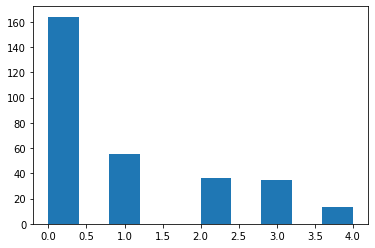

In [7]:
plt.hist(dataset[13], lw = 8, alpha= 1)
plt.show()

In [8]:
columns = {0:'age',1:'sex',2:'cp',3:'trestbps',4:'chol',5:'fbs',6:'restecg',
           7:'thalach',8:'exang',9:'oldpeak',10:'slope',11:'ca',12:'thal',13:'target'}
df = dataset.rename(columns = columns)


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
#ca1 =df['ca'].str.strip('?')

In [11]:
df['ca'].isin(['?']).sum()

4

In [12]:
df[df['ca']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [13]:
df.drop(df[df['ca']=='?'].index, inplace=True)

In [14]:
df.drop

<bound method DataFrame.drop of       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca tha

In [15]:
df.drop(df[df['thal']=='?'].index, inplace=True)

In [16]:
#new_df = df.replace(to_replace= '?', value=None, method='ffill')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [17]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [18]:
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(X)

In [19]:
print(scaled_x.mean(axis=0))
print(scaled_x.std(axis=0))

[0.53212682 0.67676768 0.71941639 0.35560003 0.27705518 0.14478114
 0.4983165  0.59999486 0.32659933 0.1702509  0.3013468  0.22558923
 0.43265993]
[0.18821849 0.46771058 0.3210779  0.1672913  0.11851591 0.35188004
 0.49661873 0.17483135 0.4689693  0.18776741 0.30857259 0.31246082
 0.48384055]


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_x, Y, test_size=0.2, random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
KNN = KNeighborsClassifier()
fitted_model = KNN.fit(X_train, Y_train)

In [24]:
prediction = KNN.predict(X_test)

In [25]:
prediction[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [27]:
print(confusion_matrix(prediction, Y_test))
print(accuracy_score(prediction,Y_test))

[[34  5  2  2  0]
 [ 2  2  1  1  2]
 [ 0  2  1  2  1]
 [ 0  0  1  1  0]
 [ 0  0  0  1  0]]
0.6333333333333333


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_model = LogisticRegression(solver='lbfgs')
logistic_fit = log_model.fit(X_train, Y_train)

E:\InstalledSoftware\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
logistic_pre = log_model.predict(X_test)

In [31]:
print(accuracy_score(logistic_pre, Y_test))
print(confusion_matrix(logistic_pre, Y_test))

0.6166666666666667
[[35  5  2  3  2]
 [ 1  1  1  1  0]
 [ 0  1  1  2  0]
 [ 0  2  1  0  1]
 [ 0  0  0  1  0]]


In [32]:
df['target'][df['target'] == 2] = 1
df['target'][df['target'] == 3] = 1
df['target'][df['target'] == 4] = 1

In [33]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [34]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [35]:
x_scaled = scaler.fit_transform(x)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [37]:
#Regression model fitting
reg_model = log_model.fit(x_train, y_train)

In [38]:
reg_predict = log_model.predict(x_test)

In [39]:
print(accuracy_score(reg_predict, y_test))
print(confusion_matrix(reg_predict, y_test))

0.9
[[32  2]
 [ 4 22]]


In [40]:
#KNN MODEL fitting
knn_fitted = KNN.fit(x_train, y_train)

In [41]:
prediction_knn = knn_fitted.predict(x_test)

In [42]:
prediction_knn

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [43]:
print(accuracy_score(prediction_knn, y_test))
print(confusion_matrix(prediction_knn, y_test))

0.85
[[32  5]
 [ 4 19]]


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()
lr_fit = lr.fit(x_train,y_train)

In [46]:
lr_predict = lr_fit.predict(x_test)

In [47]:
lr_predict

array([-0.06087541,  0.30739147, -0.14337545,  1.04742492,  0.04229144,
        0.37557271,  0.1764965 ,  0.55066831,  0.68749223,  0.2483722 ,
        0.57083168,  0.15971166, -0.11687178,  0.28509299,  0.35863315,
       -0.18677378,  0.34818907,  0.48434164,  0.48260449,  0.0870567 ,
        0.70382255,  0.62482951,  0.55602869,  0.19499895,  0.73958987,
        0.06585242,  0.9748024 ,  0.53569536,  0.28971552,  0.02072541,
        0.14556485, -0.20015384,  1.11000684,  0.24110565,  0.22057578,
        0.25631954,  0.52096713,  0.0903534 ,  1.1522579 ,  0.69660199,
        0.02896537,  0.88574772,  0.80185394,  0.52420919, -0.06700514,
        0.46682508,  0.28154116,  1.10133294,  0.41911061,  0.00879374,
        0.02852483,  0.80060174,  0.22171801,  0.16421951,  0.82814966,
        0.57166696,  0.04604935,  0.18298637,  0.65608237,  0.74955211])

In [48]:
print(accuracy_score(prediction_knn, y_test))
print(confusion_matrix(prediction_knn, y_test))

0.85
[[32  5]
 [ 4 19]]


In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtc = DecisionTreeClassifier()
dtc_fit = dtc.fit(x_train, y_train)

In [51]:
dtc_predict = dtc_fit.predict(x_test)
dtc_predict

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [52]:
print(accuracy_score(dtc_predict, y_test))
print(confusion_matrix(dtc_predict, y_test))

0.7666666666666667
[[28  6]
 [ 8 18]]


In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
nbc = GaussianNB()
nbc_fit = nbc.fit(x_train,y_train)

In [55]:
nbc_predict = nbc_fit.predict(x_test)
nbc_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [56]:
print(accuracy_score(nbc_predict, y_test))
print(confusion_matrix(nbc_predict, y_test))

0.9166666666666666
[[35  4]
 [ 1 20]]


In [58]:
from sklearn.neural_network import MLPClassifier

In [62]:
mlp = MLPClassifier(max_iter = 2000)
mlp_fit = mlp.fit(x_train,y_train)

In [63]:
mlp_predict = mlp_fit.predict(x_test)
mlp_predict

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [64]:
print(accuracy_score(mlp_predict, y_test))
print(confusion_matrix(mlp_predict, y_test))

0.8666666666666667
[[32  4]
 [ 4 20]]


In [65]:
x_train.shape

(237, 13)